CARICO CONDUZIONE CAVO AWG36 (x24 fili)

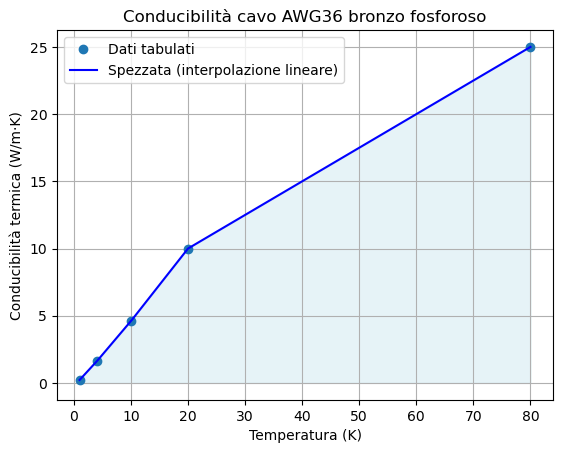

L'integrale della conducibilità termica tra 4 K e 55 K è: 594.7250 W/m·K
Rapporto A/l = 2.1113e-08
Integral 594.725004725826
Q = 3.0135e-04 W


In [7]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import quad



#--------INTEGRALE DI CONDUCIBILITà----------------
# Valori da specifiche cavo AWG36
T_points = [1, 4, 10, 20, 80]     # Temperatura
k_points = [0.22, 1.6, 4.6, 10, 25]  # Conducibilità termica

# Creare la spezzata (interpolazione lineare)
spezzata = interp1d(T_points, k_points, kind='linear', fill_value="extrapolate")

# Intervallo di temperatura per disegno
T_range = np.linspace(min(T_points), max(T_points), 500)

# Calcolo dei valori interpolati per la spezzata
k_values = spezzata(T_range)

# Plot della spezzata
plt.plot(T_points, k_points, 'o', label='Dati tabulati')  # Punti dati originali
plt.plot(T_range, k_values, label='Spezzata (interpolazione lineare)', color='blue')  # Spezzata interpolata
plt.fill_between(T_range, k_values, alpha=0.3, color='lightblue')  # Area sotto la curva
plt.title('Conducibilità cavo AWG36 bronzo fosforoso')
plt.xlabel('Temperatura (K)')
plt.ylabel('Conducibilità termica (W/m·K)')
plt.grid(True)
plt.legend()
plt.show()

# Funzione per l'integrazione
def integrand(T):
    return spezzata(T)

# Inserire gli estremi per l'integrazione
T_min = 4
T_max = 55

# Controllo se gli estremi sono validi
if T_min < min(T_points) or T_max > max(T_points):
    print("Errore: Gli estremi dell'integrazione devono essere compresi tra 1 K e 80 K.")
else:
    # Calcolo dell'integrale (area sottesa)
    integral_value, error = quad(integrand, T_min, T_max)
    print(f"L'integrale della conducibilità termica tra {T_min} K e {T_max} K è: {integral_value:.4f} W/m·K")


#--------CONDUCIBILITà DA PARAMETRI GEOMETRICI----------------
# Caratteristiche geometriche cavo AWG36 
diam = 0.127e-3
l = 60e-2 # lunghezza cavo
A = np.pi * (diam/2)**2
n = 24 # numero di cavi


# Calcolo di Q
Q = A/l * integral_value * n        

# Output del risultato
print(f"Rapporto A/l = {A/l:.4e}")
print(f"Integral {integral_value}")
print(f"Q = {Q:.4e} W")


